In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

# Import and read the charity_data.csv.
import pandas as pd 
stroke_df = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**EDA**


In [2]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [3]:
stroke_df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
stroke_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
# Drop the non-beneficial ID columns
stroke_df = stroke_df.drop(columns = ['id'])

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>],
       [<Axes: title={'center': 'heart_disease'}>,
        <Axes: title={'center': 'avg_glucose_level'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'stroke'}>]], dtype=object)

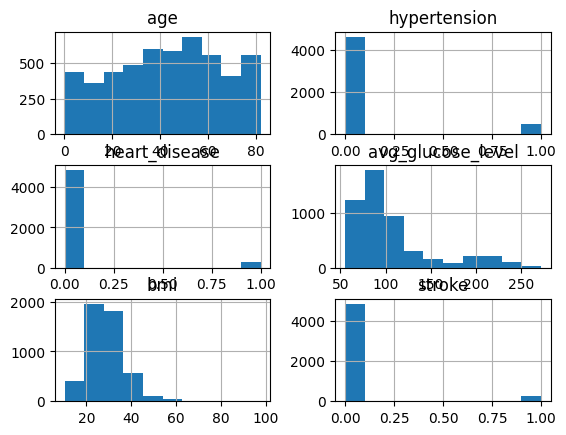

In [6]:
stroke_df.hist()

In [7]:
# Determine the number of unique values in each column.
stroke_df.nunique() 

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [8]:
# Look at gender value counts
gender_counts = stroke_df['gender'].value_counts()
gender_counts

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [9]:
# Drop the record with gender = 'Other'
stroke_df = stroke_df.drop(stroke_df[stroke_df['gender'] == 'Other'].index)

In [10]:
# Look at work type value counts
work_counts = stroke_df['work_type'].value_counts()
work_counts

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [11]:
# Look at smoking status value counts
smoke_counts = stroke_df['smoking_status'].value_counts()
smoke_counts

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

In [12]:
# Look at age value counts
age_counts = stroke_df['age'].value_counts()
age_counts

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64

In [32]:
# Look at the records with NaN bmi values
stroke_df[stroke_df['bmi'].isnull()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
5039,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [13]:
# Create a list of age for binning
age_to_replace = age_counts[age_counts < 10].index

# Replace in dataframe
for age in age_to_replace:
    stroke_df['age'] = stroke_df['age'].replace(age,"Other")
    
# Check to make sure binning was successful
stroke_df['age'].value_counts()

Other    120
78.0     102
57.0      95
52.0      90
54.0      87
        ... 
11.0      36
10.0      35
4.0       34
7.0       32
6.0       24
Name: age, Length: 82, dtype: int64

In [14]:
#stroke_df['bmi'] = stroke_df['bmi'].replace(np.NaN, stroke_df['bmi'].mean())

In [15]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   object 
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 479.0+ KB


In [36]:
# Average BMI by age 
avg_bmi_age = stroke_df.groupby('age')['bmi'].mean()

In [38]:

avg_bmi_age_df = pd.DataFrame(avg_bmi_age)

In [31]:
avg_bmi_age_df['bmi']

,bmi
age,
2.0,19.089091
3.0,18.618182
4.0,18.100000
5.0,18.937500
6.0,18.695652
...,...
79.0,27.862338
80.0,28.783582
81.0,27.951667


In [41]:
avg_bmi_age_df.reset_index()

,age,bmi
0,2.0,19.089091
1,3.0,18.618182
2,4.0,18.100000
3,5.0,18.937500
4,6.0,18.695652
...,...,...
77,79.0,27.862338
78,80.0,28.783582
79,81.0,27.951667
80,82.0,28.029091


In [42]:
new_df = pd.merge(stroke_df, avg_bmi_age_df, how = 'left', on = ['age', 'bmi'])

In [24]:
stroke_df.fillna

In [27]:
# replace NaN bmi to the mean bmi value of that age 

stroke_df[stroke_df['bmi'].isnull()]['age']


1       61.0
8       59.0
13      78.0
19      57.0
27      58.0
        ... 
5039    41.0
5048    40.0
5093    45.0
5099    40.0
5105    80.0
Name: age, Length: 201, dtype: object